In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
TempData=pd.read_csv(r'C:\Users\kelvin\Downloads\archive (31)\HCLTECH.csv')
print(TempData.shape)
TempData.head()

(5300, 15)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.0,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.0,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.0,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.3,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.0,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN


In [2]:
HCLTechStockData = TempData.dropna()
HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date)

HCLTechStockData = HCLTechStockData ['Prev Close']['2013-01-01':'2013-12-2']
HCLTechStockData

Date
2013-01-01     618.70
2013-01-02     622.15
2013-01-03     625.25
2013-01-04     625.95
2013-01-07     634.05
               ...   
2013-11-26    1053.00
2013-11-27    1059.75
2013-11-28    1058.55
2013-11-29    1062.15
2013-12-02    1086.00
Name: Prev Close, Length: 230, dtype: float64

In [3]:
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

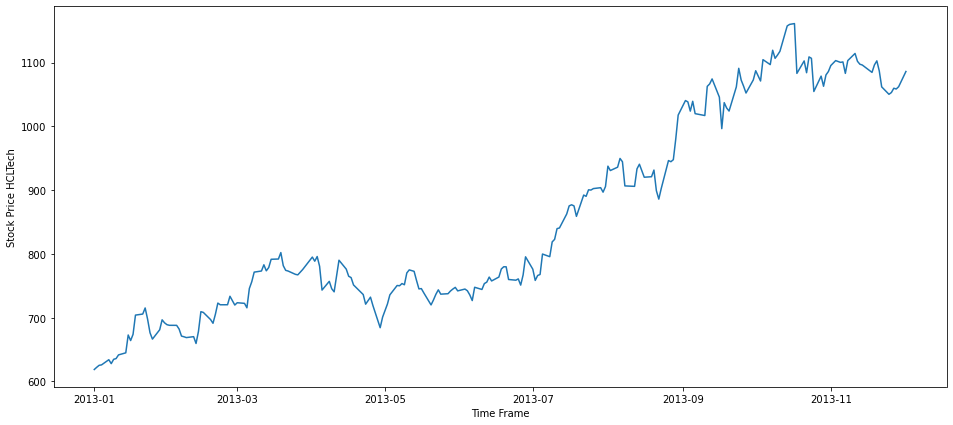

In [4]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price HCLTech')
ax1.plot(HCLTechStockData)

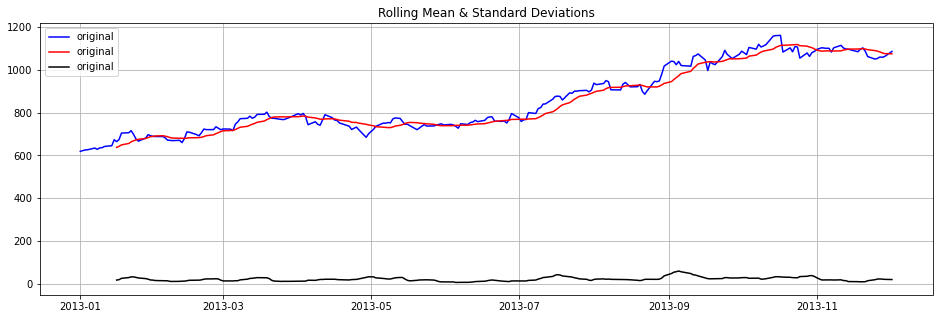

In [5]:
rollmean = HCLTechStockData.rolling(window=12).mean()
rollstd = HCLTechStockData.rolling(window=12).std()

plt.figure(figsize=(16,5))
fig = plt.figure(1)

orig = plt.plot(HCLTechStockData,color='blue',label='original')
mean = plt.plot(rollmean,color='red',label='original')
rollstd = plt.plot(rollstd,color='black',label='original')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviations')
plt.grid()
plt.show(block = False)


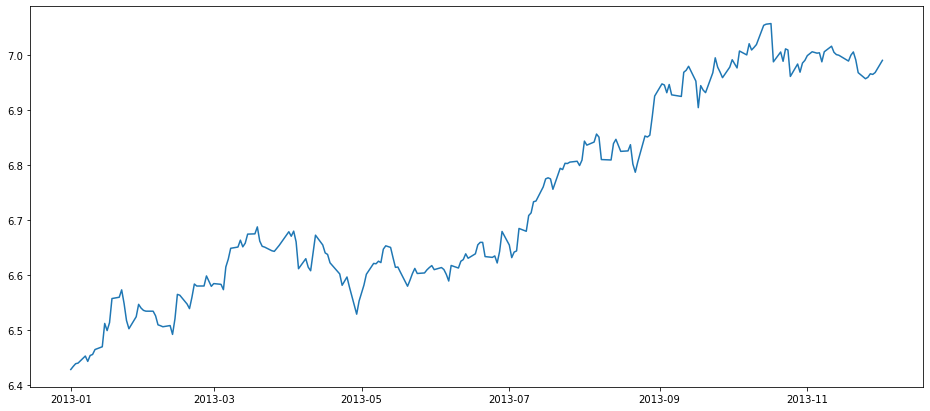

In [6]:
plt.figure(figsize=(16,7))
fig =plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

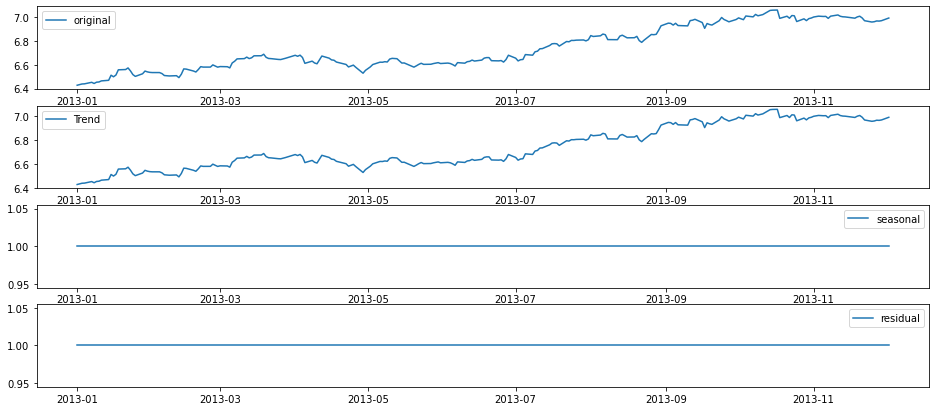

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition  = seasonal_decompose(ts_log,period=1,model='multiplication')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')


plt.show(block=False)


[]

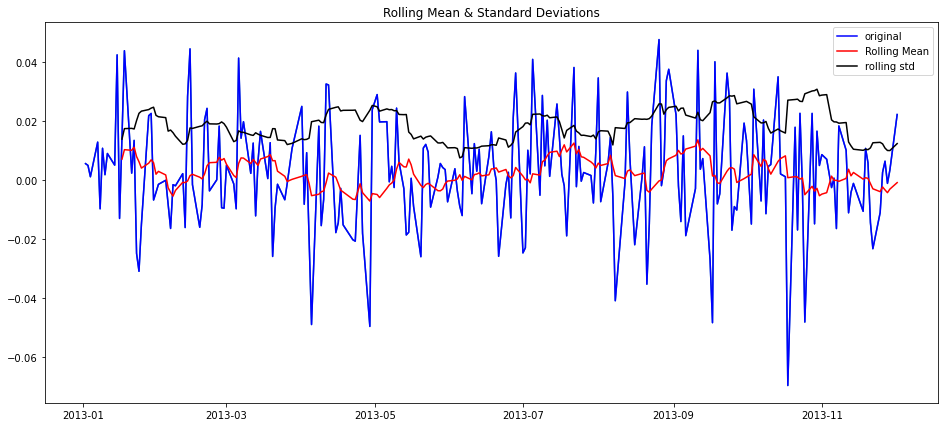

In [8]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()



orig = plt.plot(ts_log_diff,color='blue',label='original')
mean = plt.plot(rollmean,color='red',label='Rolling Mean')                
std = plt.plot(rollstd,color='black',label='rolling std')
               
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviations") 
plt.plot(block=False)               

In [9]:
df=HCLTechStockData

In [10]:
df.sort_index(inplace=True)

In [11]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(ts_log_diff,nlags=20)
lag_pacf = pacf(ts_log_diff,nlags=20)

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


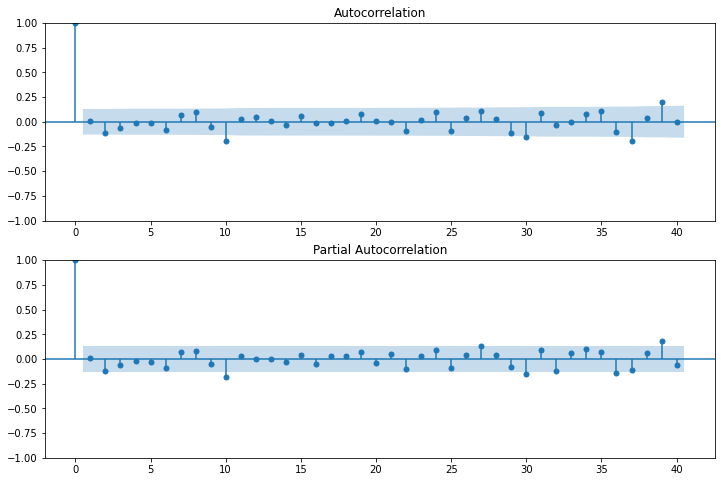

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kelvin\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'RSS:nan')

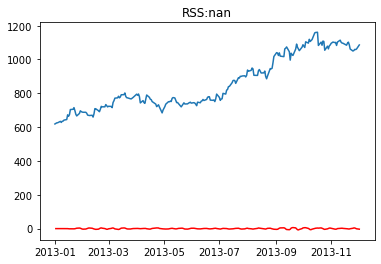

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df,order =(2,1,2),simple_differencing=True)
result_AR = model.fit()
plt.plot(df)
plt.plot(result_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((result_AR.fittedvalues[:12] - ts_log_diff)**2))

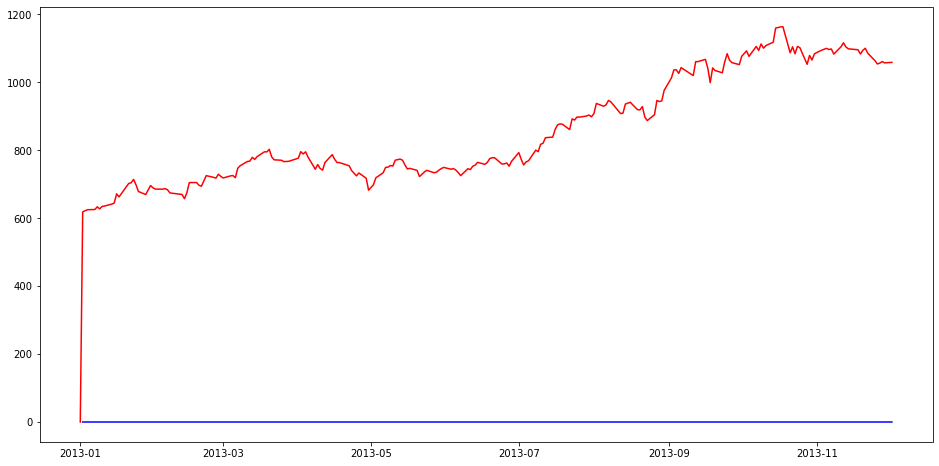

In [14]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(df,order=(2,1,2))
results_ARIMA = model.fit()

# print(results_ARIMA.summary())

plt.figure(figsize=(16,8))
plt.plot(ts_log_diff,color='blue')
plt.plot(results_ARIMA.fittedvalues,color='red')

In [15]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-01      0.000000
2013-01-02    618.696266
2013-01-03    622.068372
2013-01-04    625.014151
2013-01-07    625.615868
dtype: float64


In [16]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-01       0.000000
2013-01-02     618.696266
2013-01-03    1240.764638
2013-01-04    1865.778789
2013-01-07    2491.394657
dtype: float64


In [17]:
ARIMA_log_predictions = pd.Series(ts_log.iloc[0],index = ts_log.index)
ARIMA_log_predictions = ARIMA_log_predictions.add(ARIMA_diff_predictions_cumsum,fill_value=0)
print(ARIMA_log_predictions )

Date
2013-01-01         6.427621
2013-01-02       625.123887
2013-01-03      1247.192259
2013-01-04      1872.206410
2013-01-07      2497.822278
                  ...      
2013-11-26    190835.912491
2013-11-27    191892.611140
2013-11-28    192953.920243
2013-11-29    194011.390364
2013-12-02    195070.265799
Length: 230, dtype: float64


Text(0.5, 1.0, 'RMSE:inf')

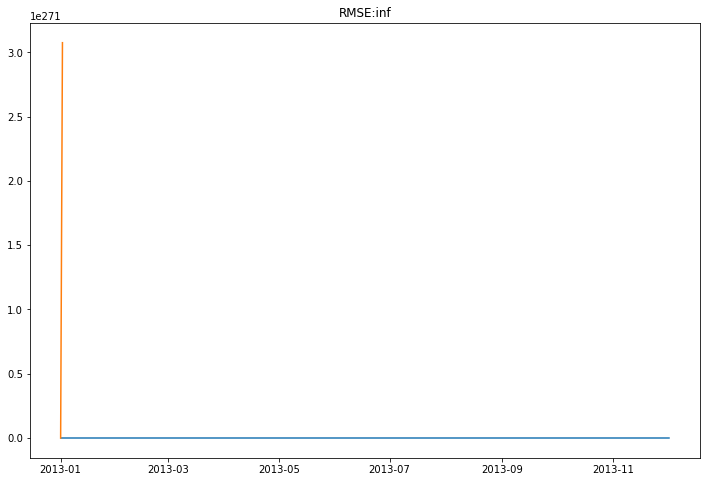

In [18]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_predictions)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE:%.4f'%np.sqrt(sum((predictions_ARIMA - df)**2)/len(df)))

In [19]:
results_ARIMA.summary()
results_ARIMA.predict(10,20)

Date
2013-01-15    644.667619
2013-01-16    671.742991
2013-01-17    662.816895
2013-01-18    672.623740
2013-01-21    702.464303
2013-01-22    704.347142
2013-01-23    714.401519
2013-01-24    698.240044
2013-01-25    678.768071
2013-01-28    669.674705
2013-01-29    683.278120
Name: predicted_mean, dtype: float64

In [20]:
ts_log

Date
2013-01-01    6.427621
2013-01-02    6.433181
2013-01-03    6.438152
2013-01-04    6.439270
2013-01-07    6.452128
                ...   
2013-11-26    6.959399
2013-11-27    6.965788
2013-11-28    6.964655
2013-11-29    6.968050
2013-12-02    6.990257
Name: Prev Close, Length: 230, dtype: float64

In [21]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries,
                             start_p =3,
                             start_q =3,
                             max_q=5,
                              max_p=5,
                             test ='adf',
                              seasonal=True,
                              trace =True
                             )
    return automodel


In [22]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.013, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.29 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 1.764 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

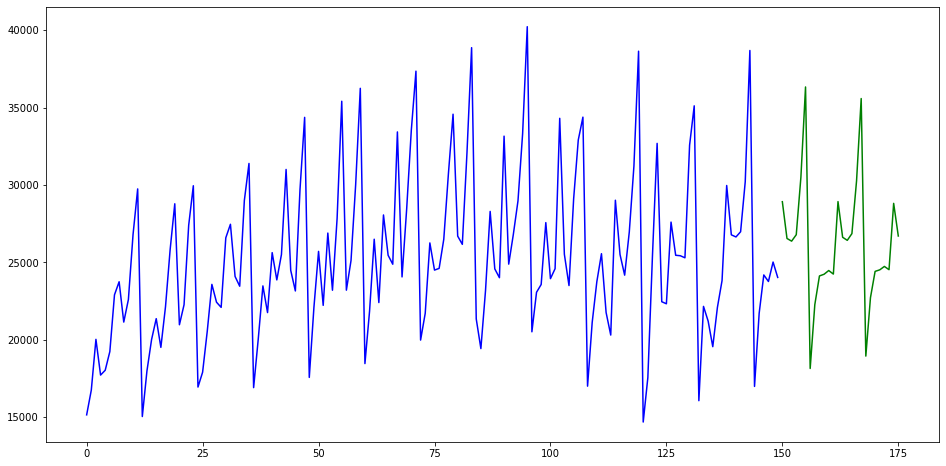

In [23]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y= pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(16,8))

x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')

plt.show()

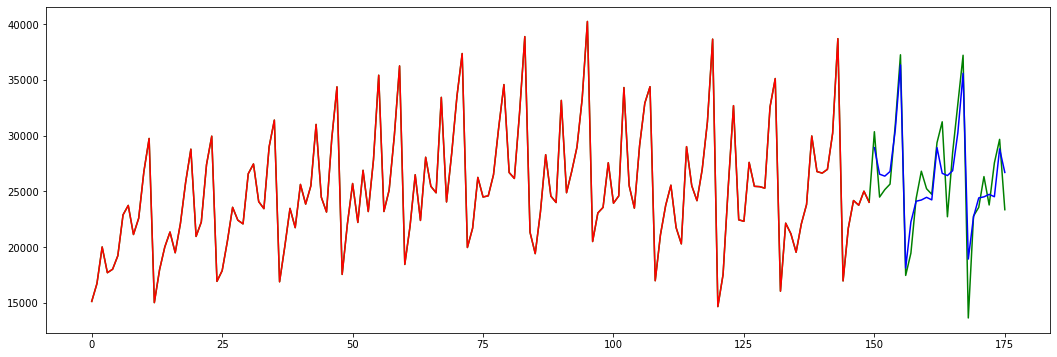

In [24]:
plt.figure(figsize=(18,6))
plt.plot(y,  c='green')
plt.plot(x[:150], train, c='red')
plt.plot(x[150:], forecasts, c='blue')

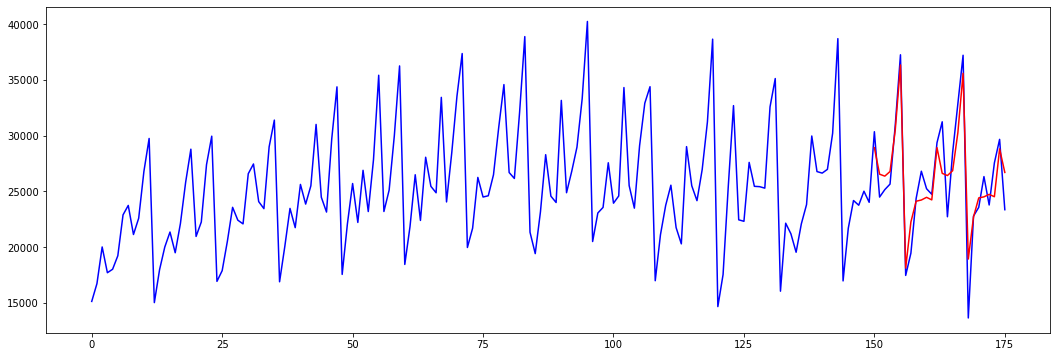

In [25]:
plt.figure(figsize=(18,6))

plt.plot(y,  c='blue')
plt.plot(x[150:], forecasts, c='red')

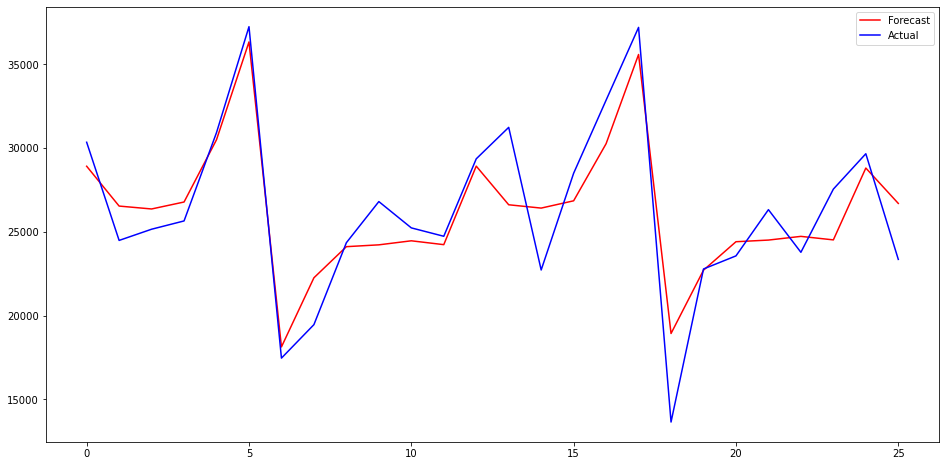

In [26]:
a =pd.DataFrame(forecasts,columns=['Forecast'])
b=pd.DataFrame(y[150:],columns=['Actual'])
ab =pd.concat([a,b],axis=1)
ab['Forecast'].plot(figsize=(16,8),color='red',label='Forecast')
ab['Actual'].plot(figsize=(16,8),color='blue',label='Actual')
plt.legend(loc='best')

In [27]:
rain = pd.read_csv(r"C:\Users\kelvin\Downloads.rainfall.csv",index_col=0,parse_dates=True)
rain.head()

,Rain
Year,
1988-01-01,56.0
1989-01-01,30.0
1990-01-01,33.0
1991-01-01,81.0
1992-01-01,4.0


In [28]:
dates =pd.date_range(start = '1/1/1988',end='12/31/2022',freq='M')
print(dates.shape)

(420,)


In [29]:
values= pd.DataFrame(dates,columns=['Year'])
rain=rain.reset_index()

In [30]:
b = pd.DataFrame(rain['Rain'])
data = pd.concat([values,b],axis=1)
data.set_index('Year',inplace=True)
data

,Rain
Year,
1988-01-31,56.0
1988-02-29,30.0
1988-03-31,33.0
1988-04-30,81.0
1988-05-31,4.0
...,...
2022-08-31,69.0
2022-09-30,212.0
2022-10-31,9.0


In [31]:
yy=rain['Rain'].replace({np.nan:0}).values
yy

array([ 56.,  30.,  33.,  81.,   4.,  96.,   0.,   0.,  32.,  25., 106.,
         6.,   5., 164., 103.,   6.,  56.,  26.,  23.,  20.,   8.,   8.,
        26.,   3.,   0.,  29.,   0.,   0.,  96.,   3.,   0.,  12.,  75.,
         3.,  17.,   0., 127.,  57.,   7.,   1., 101.,  19.,  26.,  48.,
         0., 125.,   0.,   2.,  24.,   0.,   4.,   9.,  19.,  44., 103.,
         6.,   0.,  87.,   7.,  16.,   0.,  29.,   0.,  14.,  32.,   0.,
         0.,  34.,  50.,  12.,  56.,  84., 123., 213.,   0.,   3.,  90.,
       153.,  74.,  13.,  15., 184.,   2.,  94.,  84.,  44.,  68.,  57.,
        38.,  58., 125.,  23., 285.,  53.,   7.,  22.,  77.,   9.,  44.,
        28., 198.,  14., 226.,  36.,   9., 300., 100., 205., 179., 136.,
        61., 187., 107.,  14., 371., 111.,  58.,  29., 164., 138., 271.,
       126.,  79.,  50., 160.,  59.,  88., 133.,  12., 254., 338.,  13.,
       151., 176.,  56., 334.,  70., 272.,  80., 110., 119.,  54.,  56.,
       143.,  41., 161., 177.,  67.,  96.,  52., 27

In [32]:
xx =np.arange(1,421)
xx.shape
xx

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

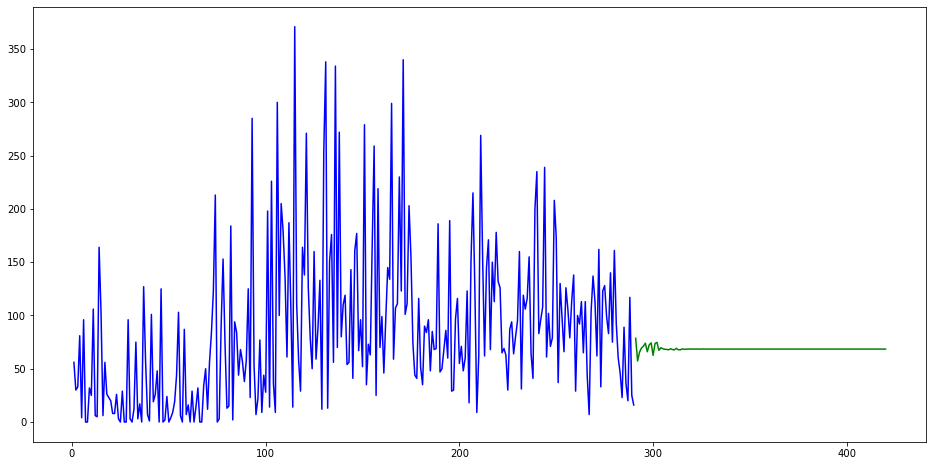

In [33]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data

train, test = train_test_split(yy, train_size=290)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
plt.figure(figsize=(16,8))

x = np.arange(y.shape[0])
plt.plot(xx[:290], train, c='blue')
plt.plot(xx[290:], forecasts, c='green')

plt.show()

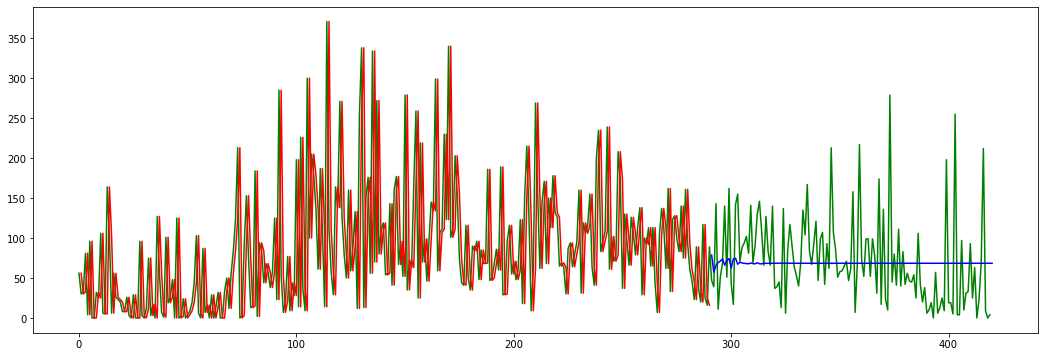

In [34]:
plt.figure(figsize=(18,6))
plt.plot(yy,  c='green')
plt.plot(xx[:290], train, c='red')
plt.plot(xx[290:], forecasts, c='blue')

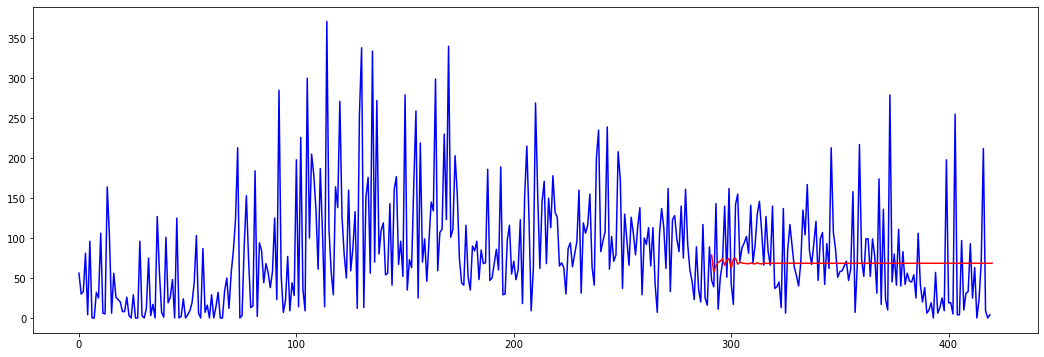

In [35]:
plt.figure(figsize=(18,6))
# plt.plot(x[:150], train, c='green')
plt.plot(yy,  c='blue')
plt.plot(xx[290:], forecasts, c='red')

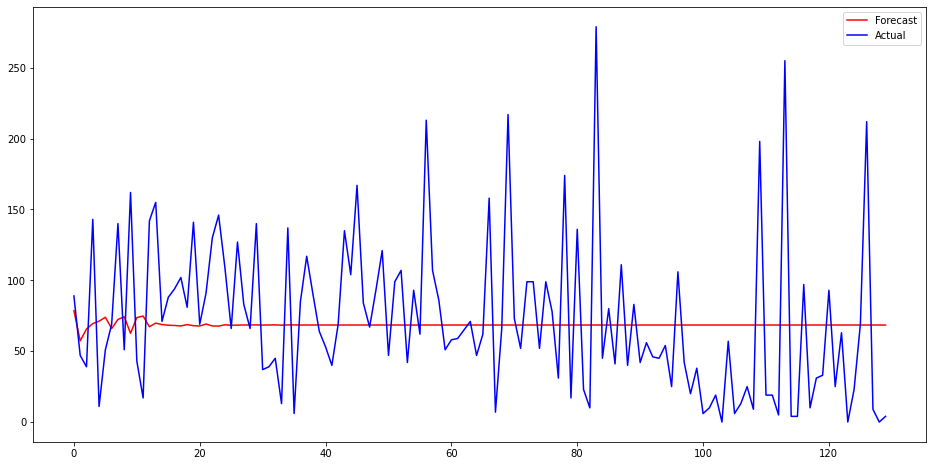

In [36]:
a =pd.DataFrame(forecasts,columns=['Forecast'])
b=pd.DataFrame(yy[290:],columns=['Actual'])
ab =pd.concat([a,b],axis=1)
ab['Forecast'].plot(figsize=(16,8),color='red',label='Forecast')
ab['Actual'].plot(figsize=(16,8),color='blue',label='Actual')
plt.legend(loc='best')

In [37]:
import pandas as pd
from pmdarima import auto_arima

In [38]:
data.head()
data.dropna(inplace=True)
data.isnull().sum()

Rain    0
dtype: int64

In [39]:
data.index

DatetimeIndex(['1988-01-31', '1988-02-29', '1988-03-31', '1988-04-30',
               '1988-05-31', '1988-06-30', '1988-07-31', '1988-08-31',
               '1988-09-30', '1988-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', name='Year', length=414, freq=None)

In [40]:
training_y =data.iloc[-290:,:1]
print(training_y.shape)
training_y

(290, 1)


,Rain
Year,
1998-10-31,254.0
1998-11-30,338.0
1998-12-31,13.0
1999-01-31,151.0
1999-02-28,176.0
...,...
2022-08-31,69.0
2022-09-30,212.0
2022-10-31,9.0


In [41]:
training_x =data.iloc[-290:,0:]
print(training_x.shape)
training_x

(290, 1)


,Rain
Year,
1998-10-31,254.0
1998-11-30,338.0
1998-12-31,13.0
1999-01-31,151.0
1999-02-28,176.0
...,...
2022-08-31,69.0
2022-09-30,212.0
2022-10-31,9.0


In [42]:
test_y =data.iloc[:-290,0:]
print(test_y.shape)
test_y

(124, 1)


,Rain
Year,
1988-01-31,56.0
1988-02-29,30.0
1988-03-31,33.0
1988-04-30,81.0
1988-05-31,4.0
...,...
1998-05-31,160.0
1998-06-30,59.0
1998-07-31,88.0


In [43]:
test_x =data.iloc[:-290,0:]
print(test_x.shape)
test_x

(124, 1)


,Rain
Year,
1988-01-31,56.0
1988-02-29,30.0
1988-03-31,33.0
1988-04-30,81.0
1988-05-31,4.0
...,...
1998-05-31,160.0
1998-06-30,59.0
1998-07-31,88.0


In [44]:
model = auto_arima(
                  y=training_y,
                  x=training_x,
                  m=7
                  )

In [45]:
predictions = pd.Series (model.predict(  n_periods = 124,
                 x = test_x))
predictions.index = test_y.index
predictions.tail()

Year
1998-05-31    49.950162
1998-06-30    49.950162
1998-07-31    49.950162
1998-08-31    49.950162
1998-09-30    49.950162
dtype: float64

<AxesSubplot:xlabel='Year'>

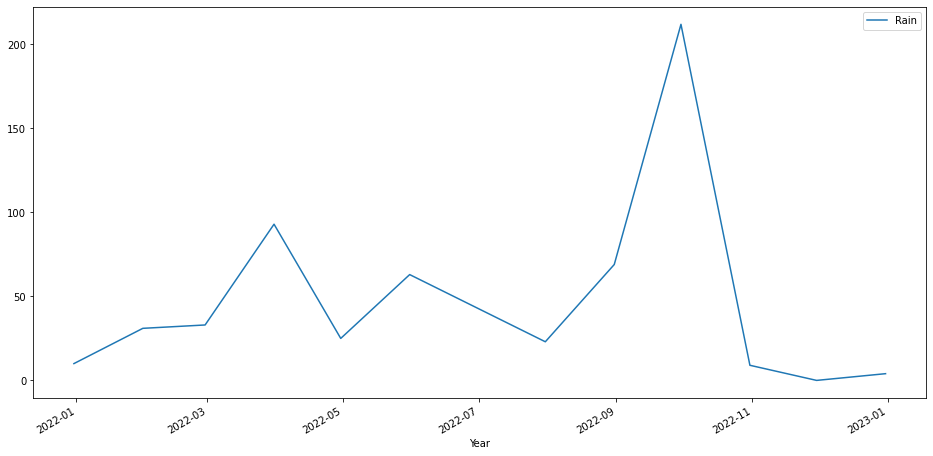

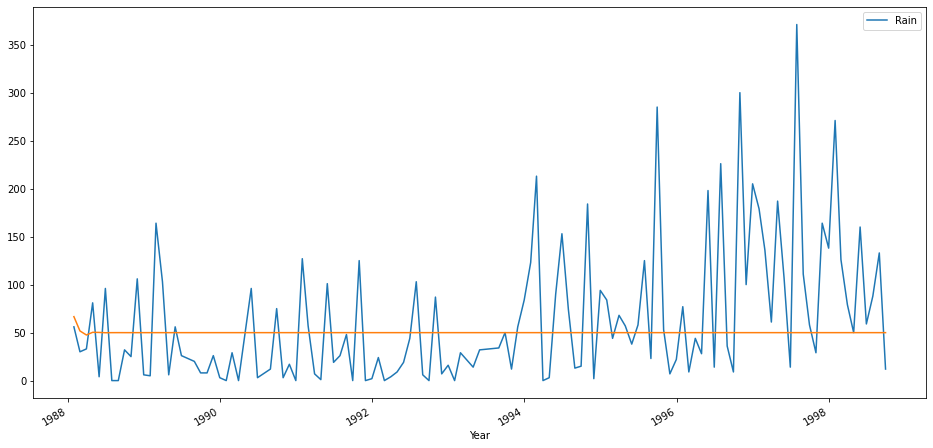

In [46]:
training_y['2021-12-31':].plot(figsize=(16,8),legend=True)
test_y.plot(figsize=(16,8),legend=True)
predictions.plot()